Yearly Economics and Unemployment (Pakistan)

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data = pd.read_csv("unemploy.csv")
data.head()

,Year,Country Name,Country Code,CPI Value,GDP value,Unemployment rate,Indicator Name_CPI,Indicator Name_GDP,Indicator Name
0,1991,Pakistan,PAK,11.791270,5.061568,0.59,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
1,1992,Pakistan,PAK,9.509041,7.705898,0.60,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
2,1993,Pakistan,PAK,9.973665,1.757748,0.62,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
3,1994,Pakistan,PAK,12.368194,3.737416,0.63,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."
4,1995,Pakistan,PAK,12.343579,4.962609,0.63,"Inflation, consumer prices (annual %)",GDP growth(annual %),"Unemployment, total (% of total labor force) (..."


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                30 non-null     int64  
 1   Country Name        30 non-null     object 
 2   Country Code        30 non-null     object 
 3   CPI Value           30 non-null     float64
 4   GDP value           30 non-null     float64
 5   Unemployment rate   30 non-null     float64
 6   Indicator Name_CPI  30 non-null     object 
 7   Indicator Name_GDP  30 non-null     object 
 8   Indicator Name      30 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.2+ KB


In [121]:
data.isnull().sum()

Year                  0
Country Name          0
Country Code          0
CPI Value             0
GDP value             0
Unemployment rate     0
Indicator Name_CPI    0
Indicator Name_GDP    0
Indicator Name        0
dtype: int64

In [122]:
data.describe()

,Year,CPI Value,GDP value,Unemployment rate
count,30.000000,30.000000,30.000000,30.000000
mean,2005.500000,8.432726,4.027440,1.441667
std,8.803408,4.076319,1.913416,1.403825
min,1991.000000,2.529328,0.525527,0.400000
25%,1998.250000,4.544513,2.599777,0.622500
50%,2005.500000,8.492206,4.328272,0.630000
75%,2012.750000,11.176210,5.410444,1.797500
max,2020.000000,20.286121,7.705898,4.650000


In [123]:
# Drop unnecessary columns
data = data.drop(columns=["Country Name", "Country Code", "Indicator Name_CPI", "Indicator Name_GDP", "Indicator Name"])

# Verify the dataset after dropping columns
data.head()


,Year,CPI Value,GDP value,Unemployment rate
0,1991,11.791270,5.061568,0.59
1,1992,9.509041,7.705898,0.60
2,1993,9.973665,1.757748,0.62
3,1994,12.368194,3.737416,0.63
4,1995,12.343579,4.962609,0.63


Exploratory Data Analysis (EDA)

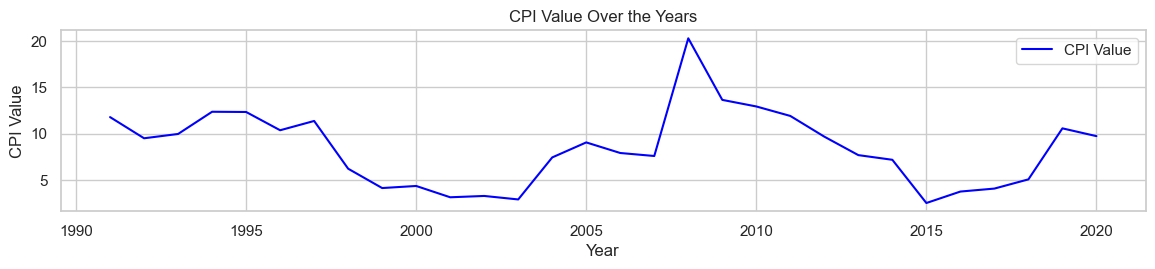

In [124]:
# Set plot style
sns.set(style="whitegrid")
# Plot CPI Value, GDP Value, and Unemployment Rate over the years
plt.figure(figsize=(14, 8))
# CPI Value over time
plt.subplot(3, 1, 1)
plt.plot(data['Year'], data['CPI Value'], color='blue', label='CPI Value')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.title('CPI Value Over the Years')
plt.legend()

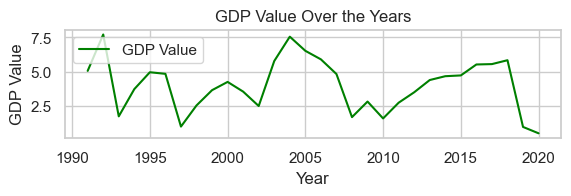

In [125]:
# GDP Value over time
plt.subplot(3, 1, 2)
plt.plot(data['Year'], data['GDP value'], color='green', label='GDP Value')
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title('GDP Value Over the Years')
plt.legend()

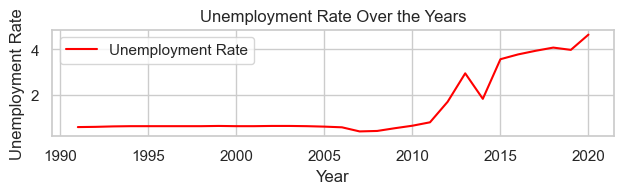

In [126]:
# Unemployment Rate over time
plt.subplot(3, 1, 3)
plt.plot(data['Year'], data['Unemployment rate'], color='red', label='Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over the Years')
plt.legend()

plt.tight_layout()
plt.show()

Check Correlations

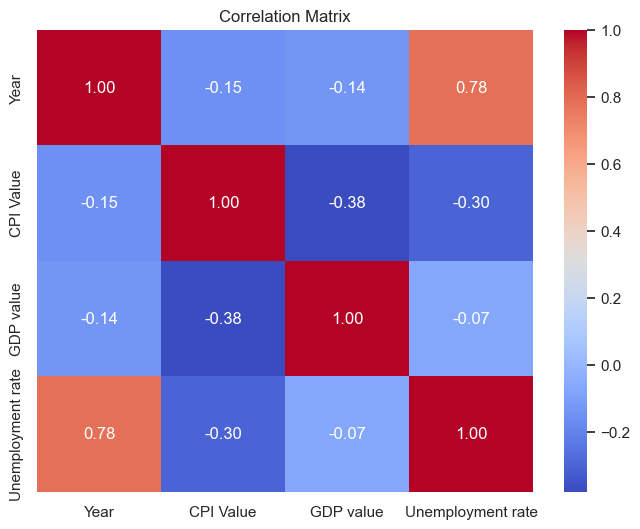

In [127]:
# Check correlations
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Prepare the Data for Modeling

In [128]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data[['CPI Value', 'GDP value']]  # Features
y = data['Unemployment rate']          # Target variable

In [129]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:

# Display the shapes of the resulting datasets
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (24, 2) (24,)
Testing set size: (6, 2) (6,)


Train a Predictive Model

Improve Model Performance

In [131]:
# Step 9: Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Step 10: Create the Random Forest model
rf_model = RandomForestRegressor()

In [132]:
# Step 11: Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [133]:
# Step 12: Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [134]:
# Get the best estimator
best_rf_model = grid_search.best_estimator_

In [135]:
# Step 13: Make predictions using the best model
y_pred_rf = best_rf_model.predict(X_test)

In [136]:
import pickle
# Save the best model to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [137]:
# Step 14: Evaluate the performance
from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [138]:
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R^2 Score: {r2_rf:.2f}")

Random Forest Mean Squared Error: 1.99
Random Forest R^2 Score: -0.18


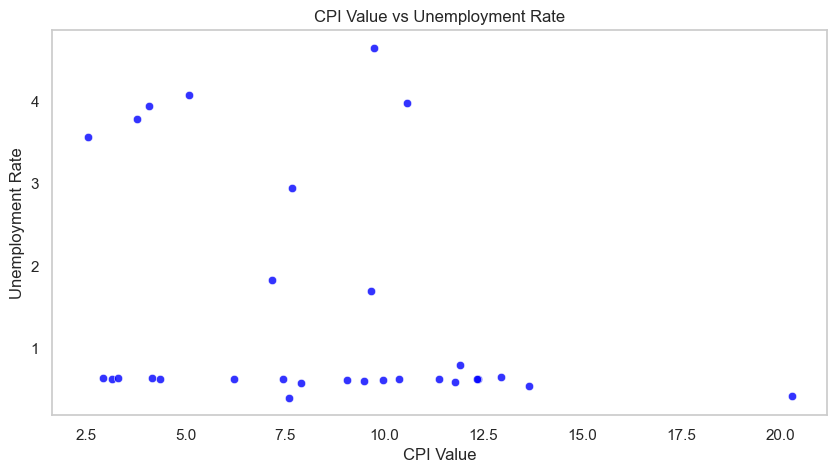

In [139]:
# Step 1: Visualize CPI vs Unemployment Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(x='CPI Value', y='Unemployment rate', data=data, color='blue' , alpha=0.8)
plt.title('CPI Value vs Unemployment Rate')
plt.xlabel('CPI Value')
plt.ylabel('Unemployment Rate')
plt.grid()
plt.show()

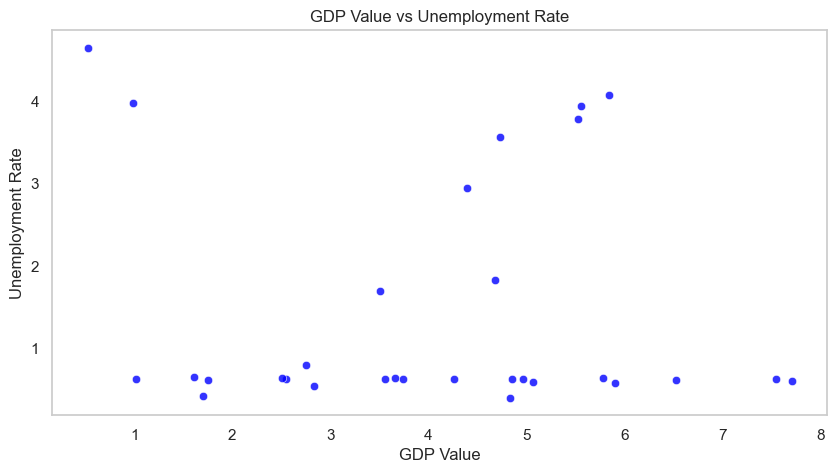

In [140]:
# Step 2: Visualize GDP vs Unemployment Rate
plt.figure(figsize=(10, 5))
sns.scatterplot(x='GDP value', y='Unemployment rate', data=data, color='blue' , alpha=0.8)
plt.title('GDP Value vs Unemployment Rate')
plt.xlabel('GDP Value')
plt.ylabel('Unemployment Rate')
plt.grid()
plt.show()

In [141]:
cpi_value = 6.78
gdp_value = 5.23 

In [142]:
result = best_rf_model.predict([[cpi_value, gdp_value]])
print("Predicted Unemployment Rate:", result[0])

Predicted Unemployment Rate: 1.2300999999999995


c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
